In [1]:
import pandas as pd 
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import folium

In [2]:
data = pd.read_csv("../datasets/Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv",index_col = 0,low_memory=False) 
data.drop(data.tail(5).index,inplace=True)#rimuove error alla fine

#data.head()

# Part 1: Temporal Patterns

In this exercise, please generate the visualizations described below. Use the same date-ranges as in Week 1. For each set of plots, describe the plots (as you would in the figure text in a report or paper), and pick a few aspects that stand out to you and comment on those (a couple of ideas below for things that could be interesting to comment on ... but it's OK to chose something else).


In [3]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

Weekly patterns. Basically, we'll forget about the yearly variation and just count up what happens during each weekday. [Here's what my version looks like.](https://raw.githubusercontent.com/suneman/socialdata2021/master/files/weekdays.png) Hint for comment: Some things make sense - for example drunkenness and the weekend. But there are some aspects that were surprising to me. Check out prostitution and mid-week behavior, for example!?

In [4]:


data['DayOfWeek'] = pd.Categorical(data['DayOfWeek'], categories=
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
    ordered=True)


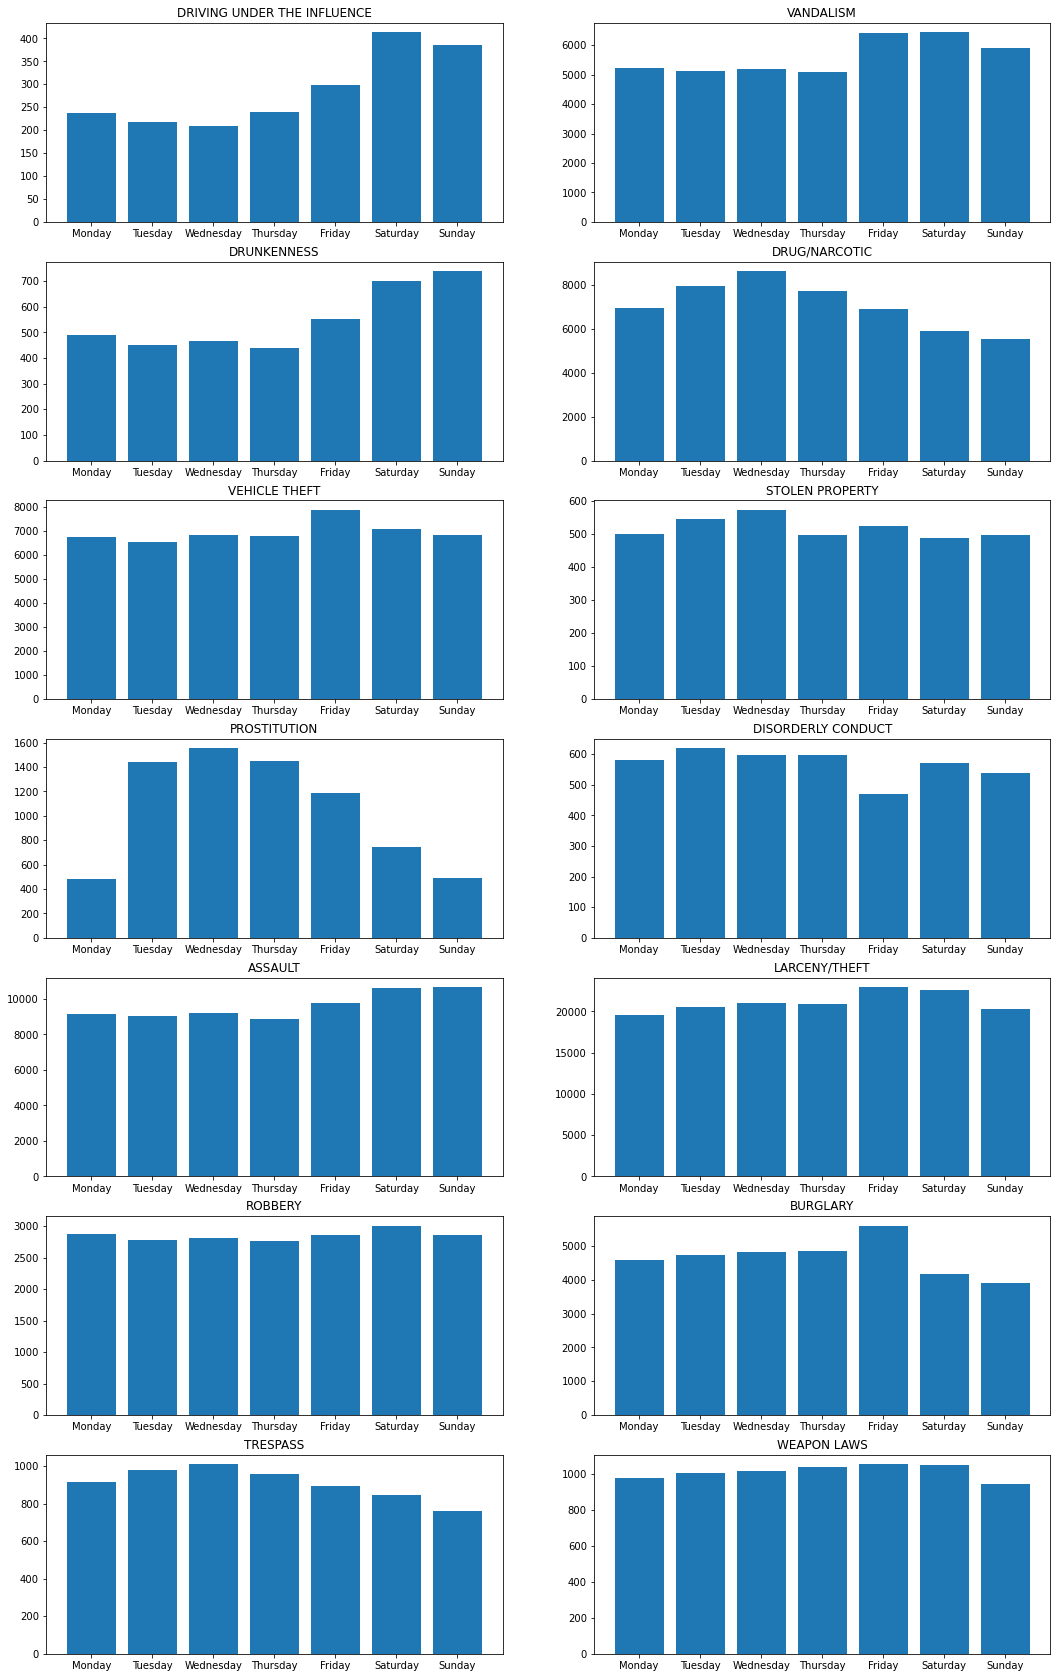

In [5]:



fig, axs = plt.subplots(7, 2,figsize=(18,30))

idx=0
for i in range (7):
    for j in range (2):
        axs[i,j].set_title(list(focuscrimes)[idx])
        
        df=data[data["Category"]==list(focuscrimes)[idx]].groupby(["DayOfWeek"]).count()["IncidntNum"].reset_index("DayOfWeek")
        axs[i,j].bar(df["DayOfWeek"],df["IncidntNum"])
        #df.plot(x="DayOfWeek",y="IncidntNum",kind="bar",ax=axs[i,j])
        
        idx+=1


**Interesting facts discovered:** First of all, drunkeness. In weekends the events are muche higher than other days because often people go out for drinking the days off the work.
Same works for Vandalism, in my opinion vandalism is mostly related to youngsters that do not have school during weekends.

++??? ADD MORE

### The months. 
We can also check if some months are worse by counting up number of crimes in Jan, Feb, ..., Dec. Did you see any surprises there?

In [6]:
data["Date"]= pd.to_datetime(data["Date"], format='%m/%d/%Y')

data["Month"] = data['Date'].dt.month

import calendar
data['Month'] = data['Month'].apply(lambda x: calendar.month_name[x])

#ORDINE IN BASE AI ESI STRA IMPORTANTE!!!!
data['Month'] = pd.Categorical(data['Month'], categories=
    ['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December'],
    ordered=True)


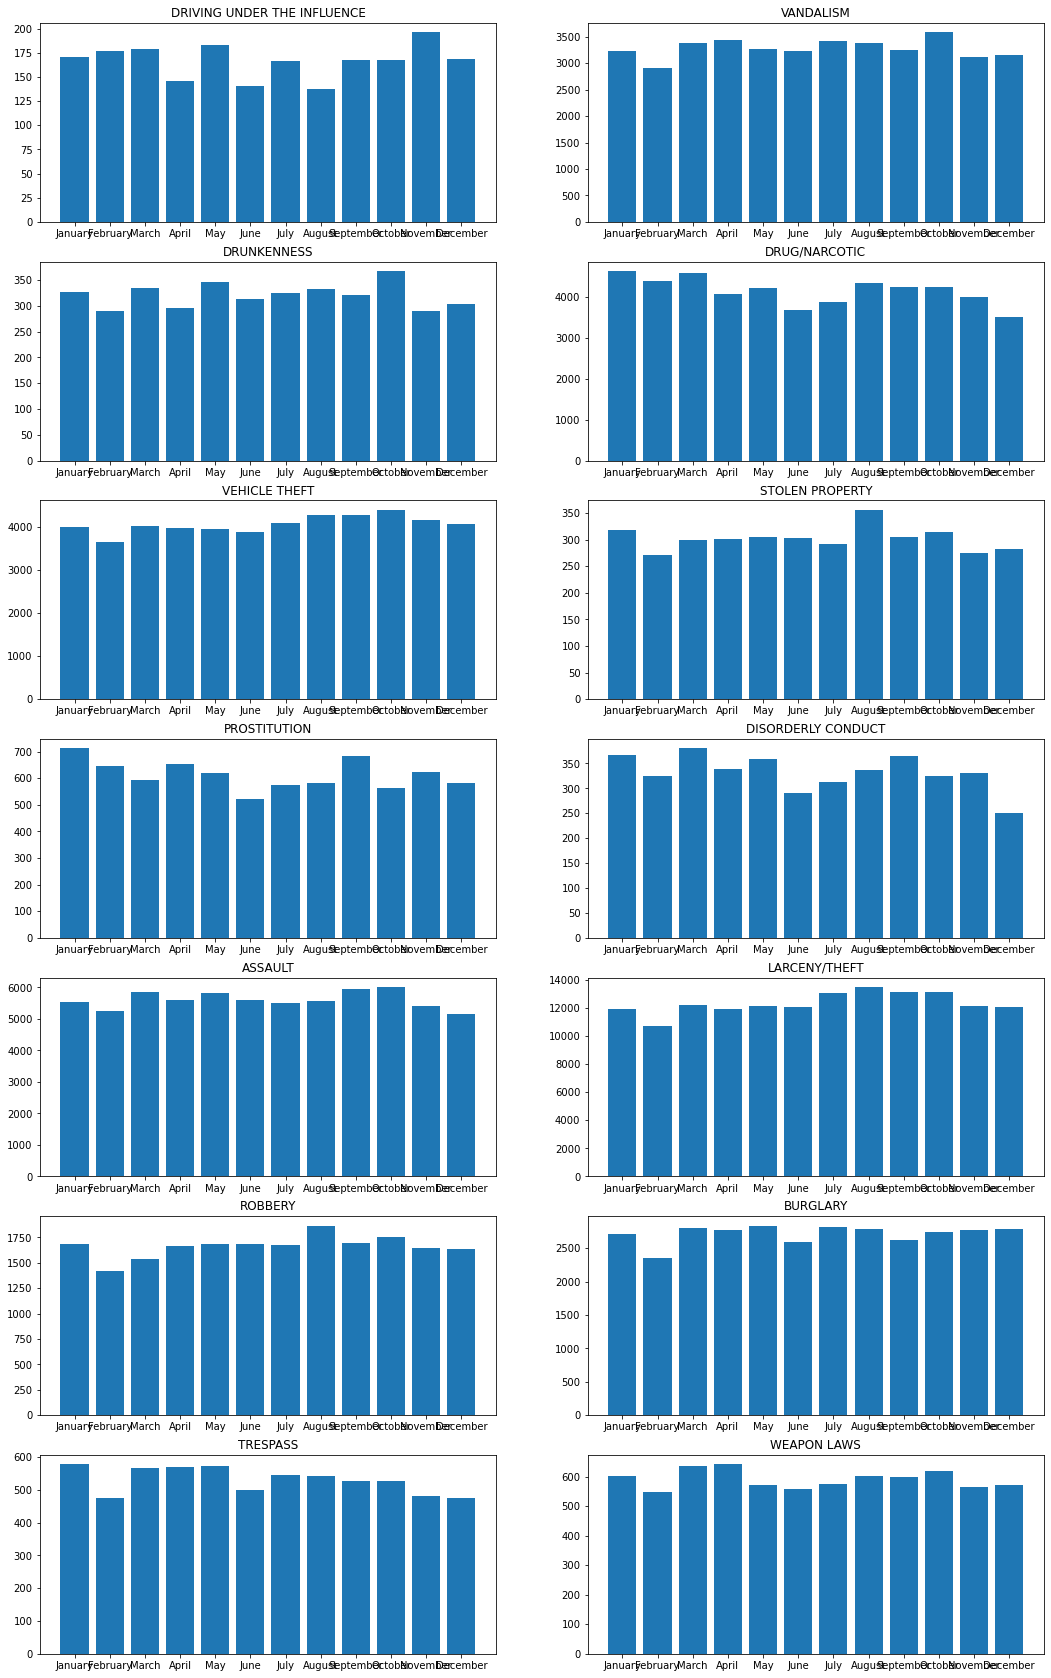

In [7]:



fig, axs = plt.subplots(7, 2,figsize=(18,30))

idx=0
for i in range (7):
    for j in range (2):
        axs[i,j].set_title(list(focuscrimes)[idx])
        
        df=data[data["Category"]==list(focuscrimes)[idx]].groupby(["Month"]).count()["IncidntNum"].reset_index("Month")
        axs[i,j].bar(df["Month"],df["IncidntNum"])
        #df.plot(x="DayOfWeek",y="IncidntNum",kind="bar",ax=axs[i,j])
        
        idx+=1


**Discoveries**: 
- On august many more stolen proerties, it is a common pattern that in August many families or people are on holiday so it's easy to steal them properties

### The 24 hour cycle. 
We'll can also forget about weekday and simply count up the number of each crime-type that occurs in the entire dataset from midnight to 1am, 1am - 2am ... and so on. Again: Give me a couple of comments on what you see.

In [8]:
data["Hour"]= pd.to_datetime(data["Time"], format='%H:%M').dt.hour


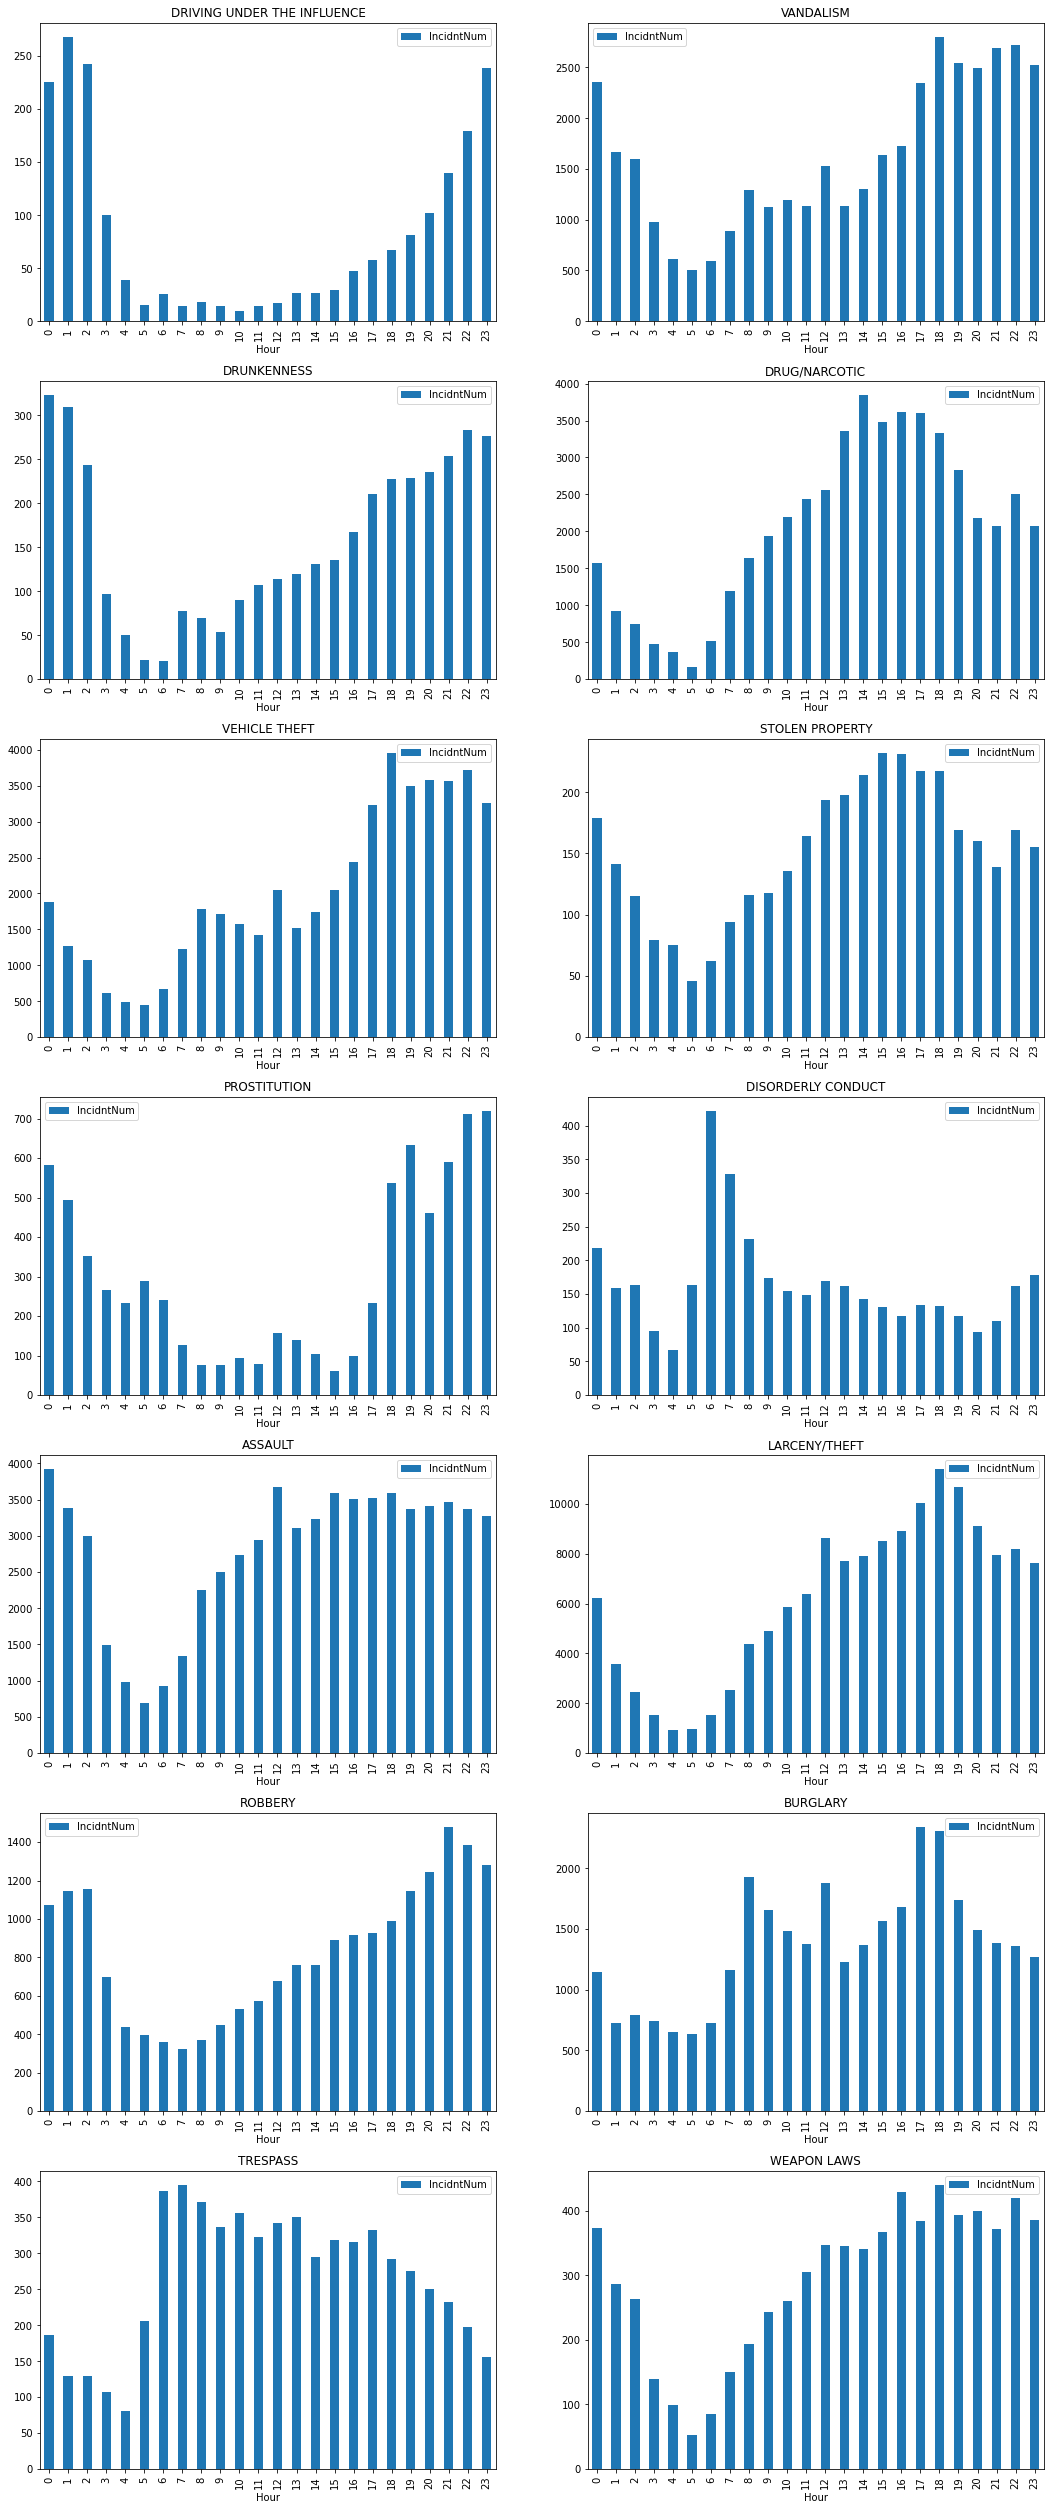

In [9]:



fig, axs = plt.subplots(7, 2,figsize=(18,45))

idx=0
for i in range (7):
    for j in range (2):
        axs[i,j].set_title(list(focuscrimes)[idx])
        
        df=data[data["Category"]==list(focuscrimes)[idx]].groupby(["Hour"]).count()["IncidntNum"].reset_index("Hour")
        #axs[i,j].bar(df["Hour"],df["IncidntNum"])
        df.plot(x="Hour",y="IncidntNum",kind="bar",ax=axs[i,j])
        
        idx+=1


**Considerations:**

### Hours of the week.

But by looking at just 24 hours, we may be missing some important trends that can be modulated by week-day, so let's also check out the 168 hours of the week. So let's see the number of each crime-type Monday night from midninght to 1am, Monday night from 1am-2am - all the way to Sunday night from 11pm to midnight.

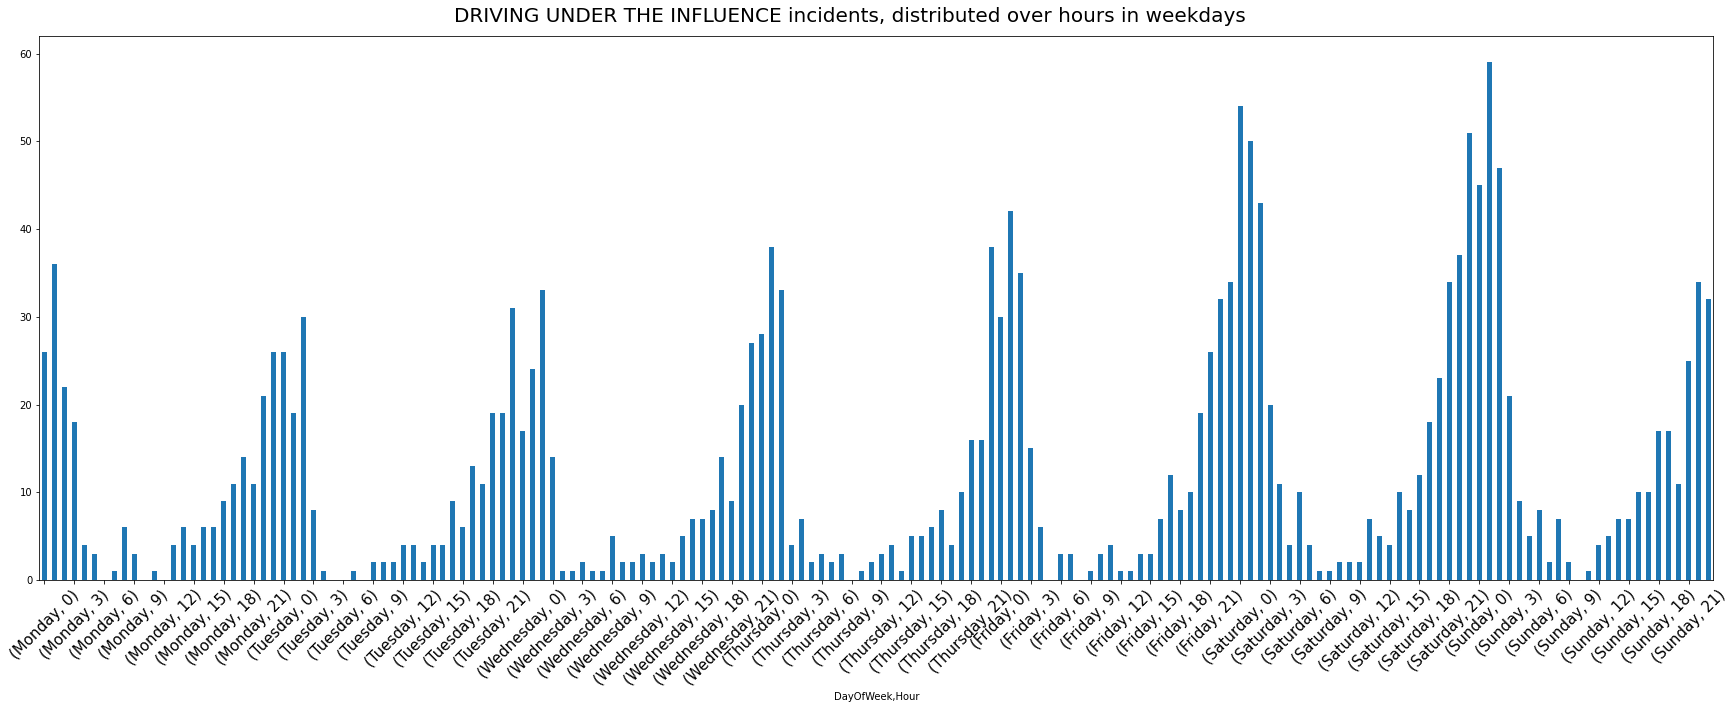

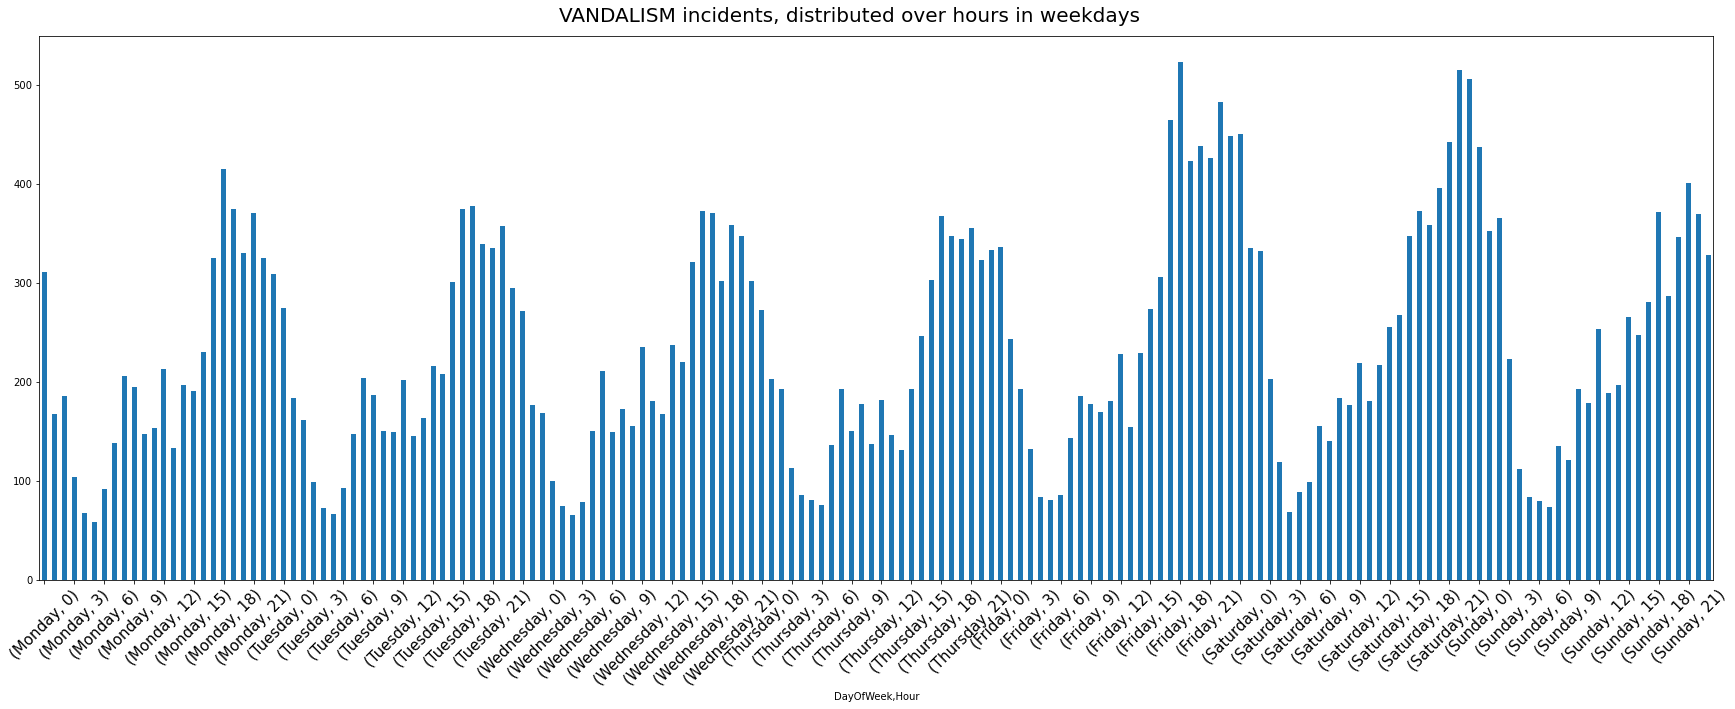

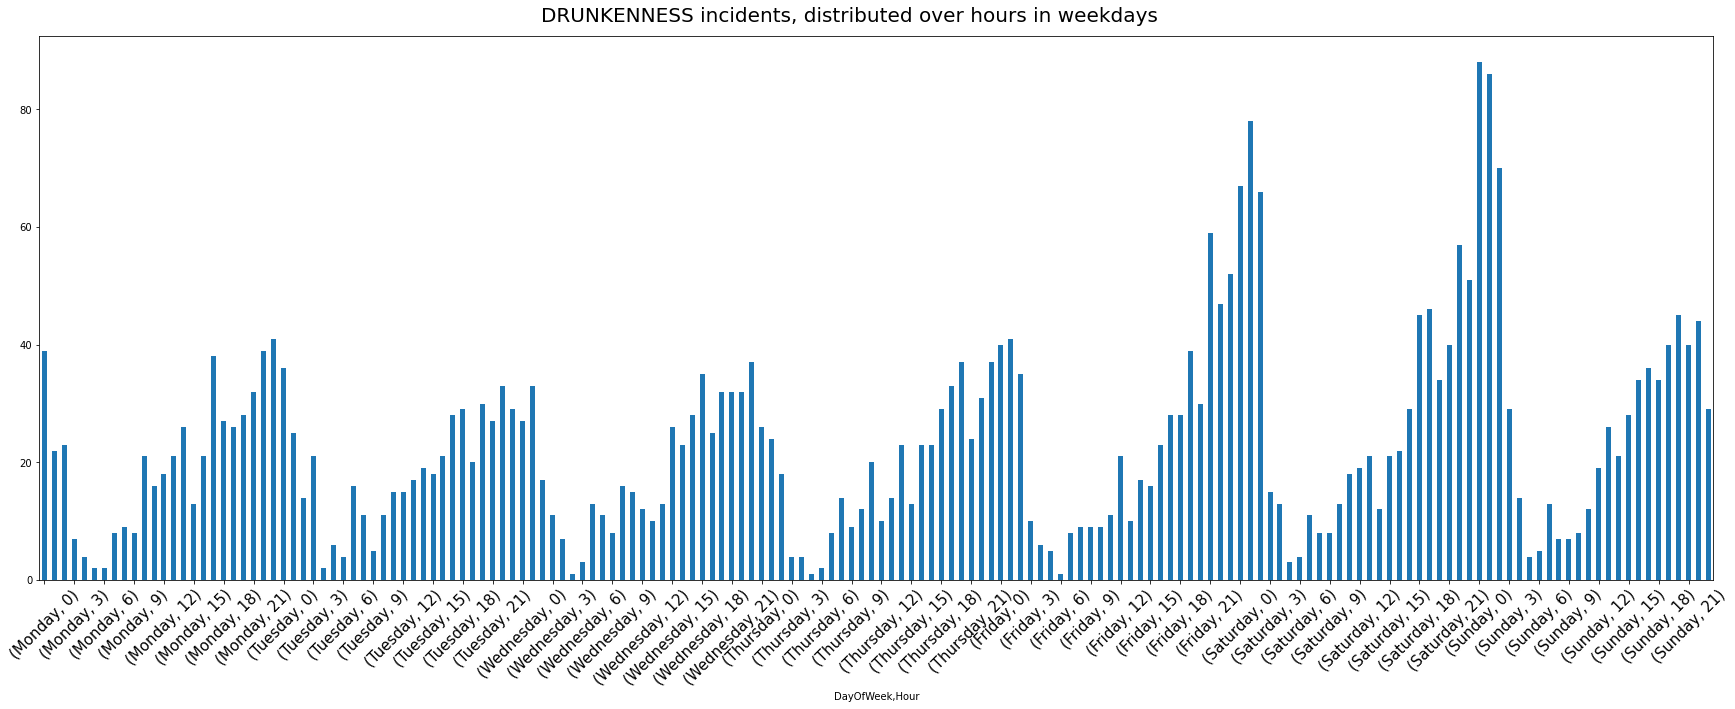

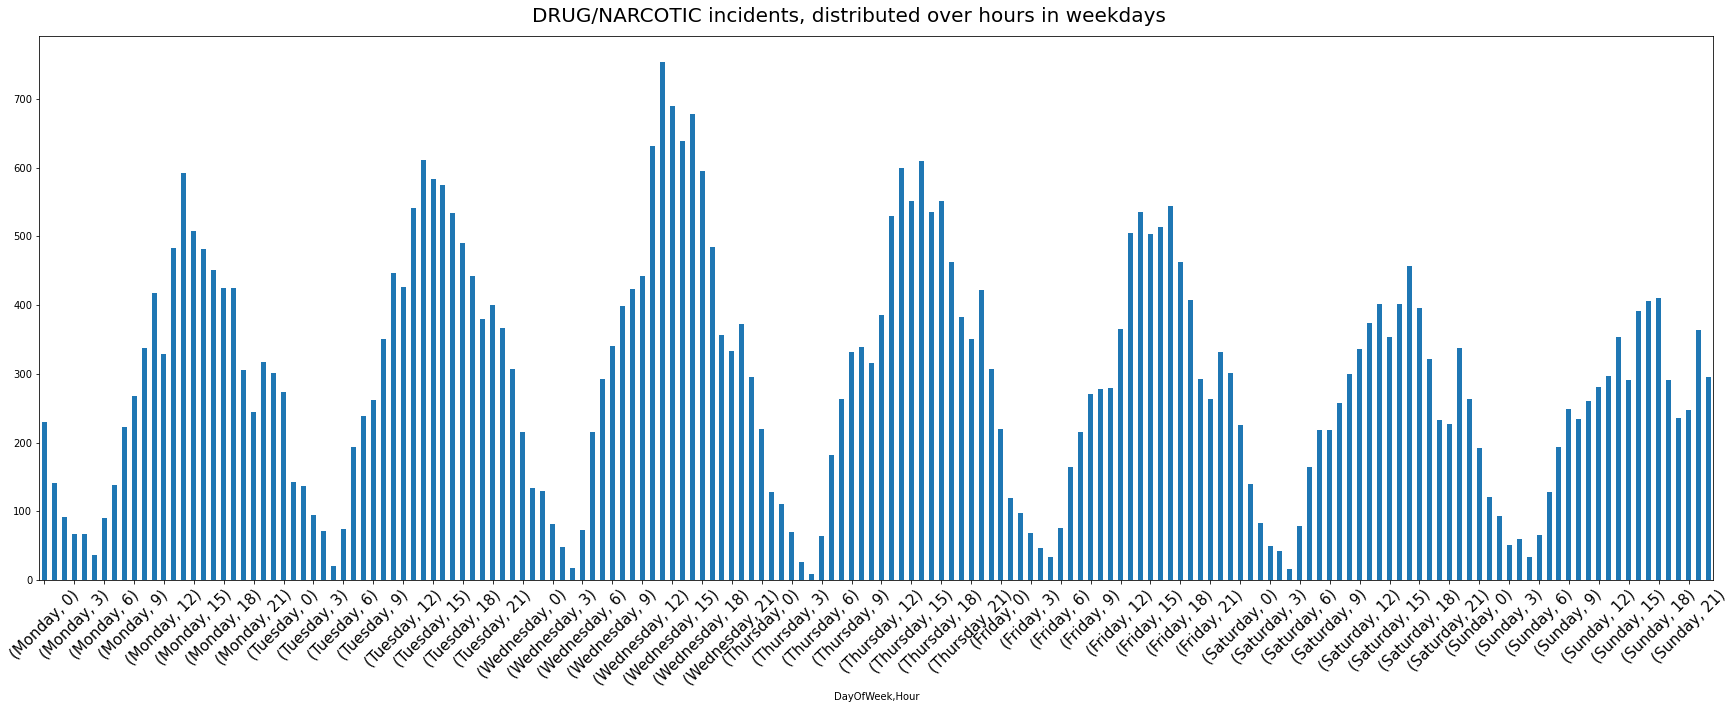

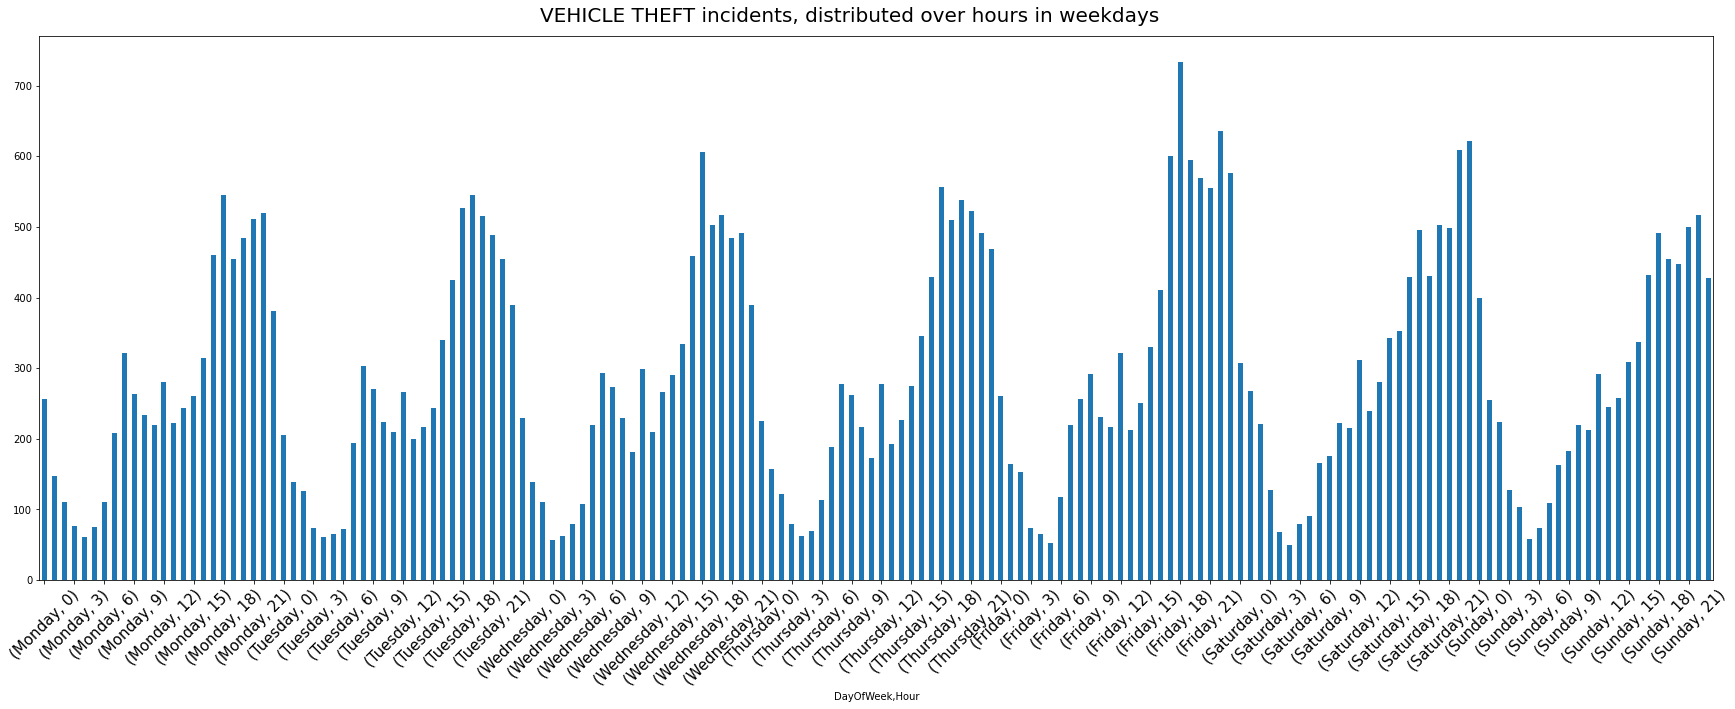

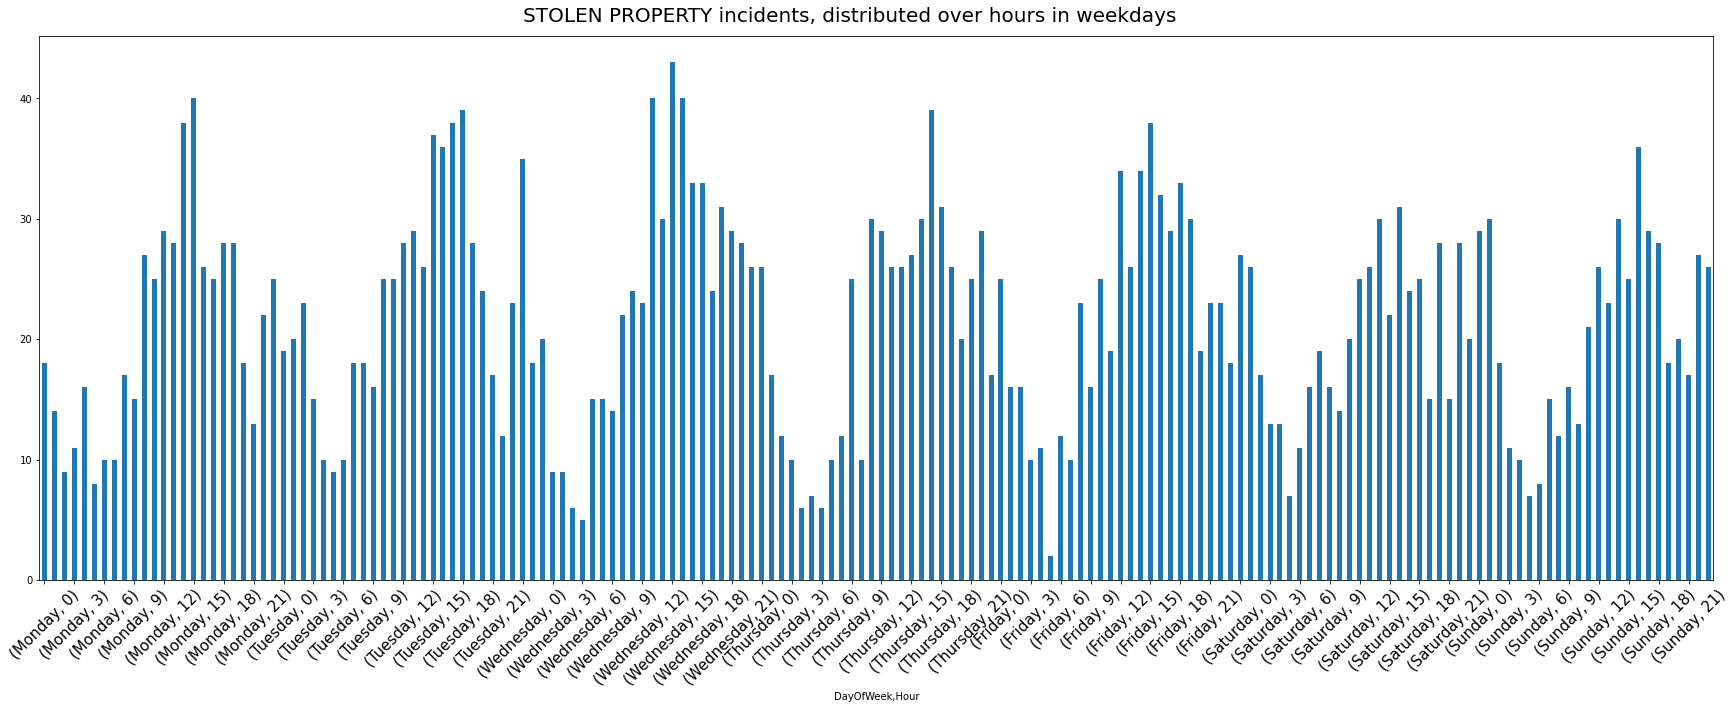

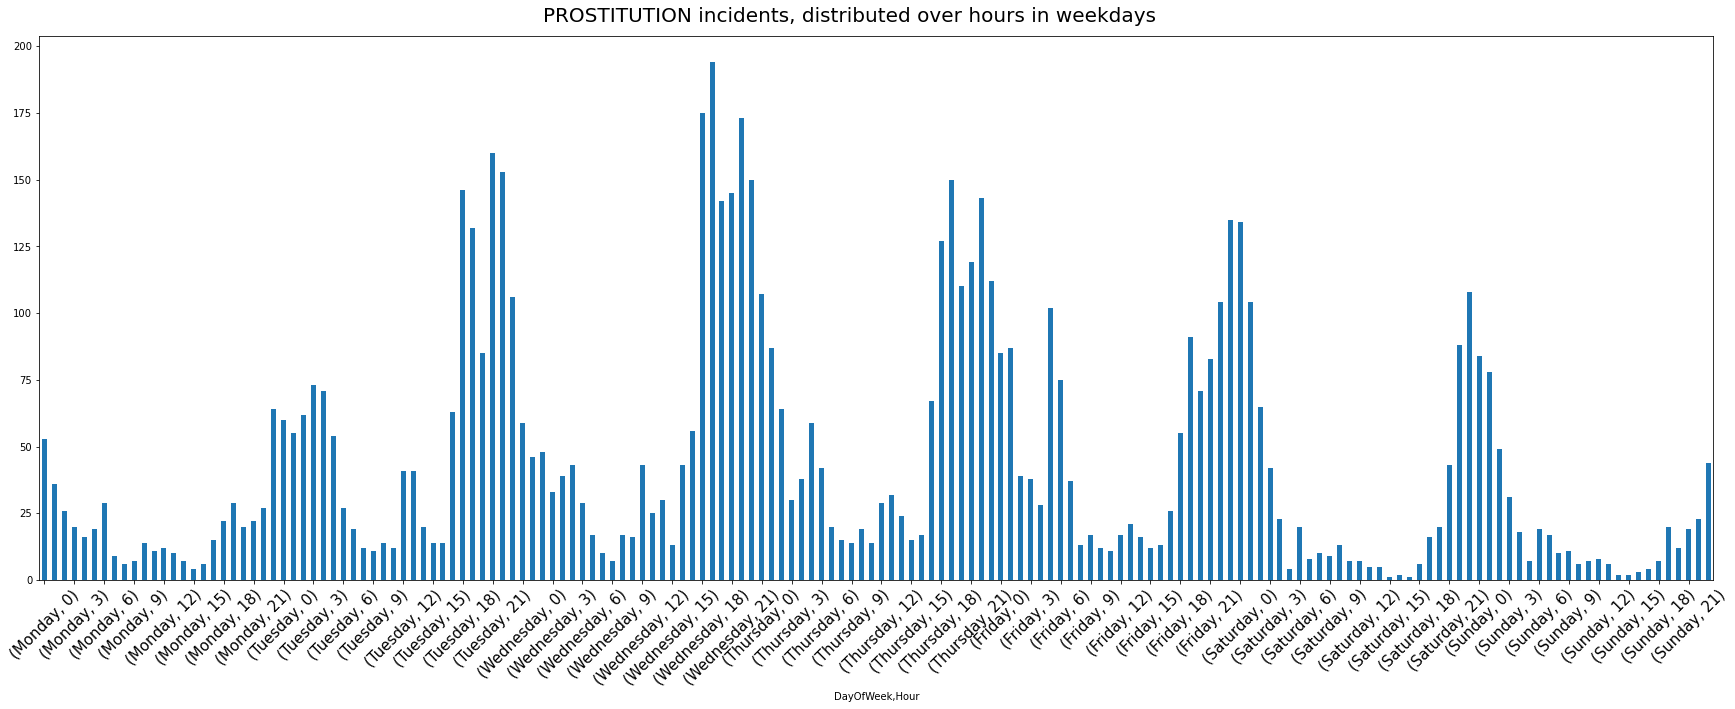

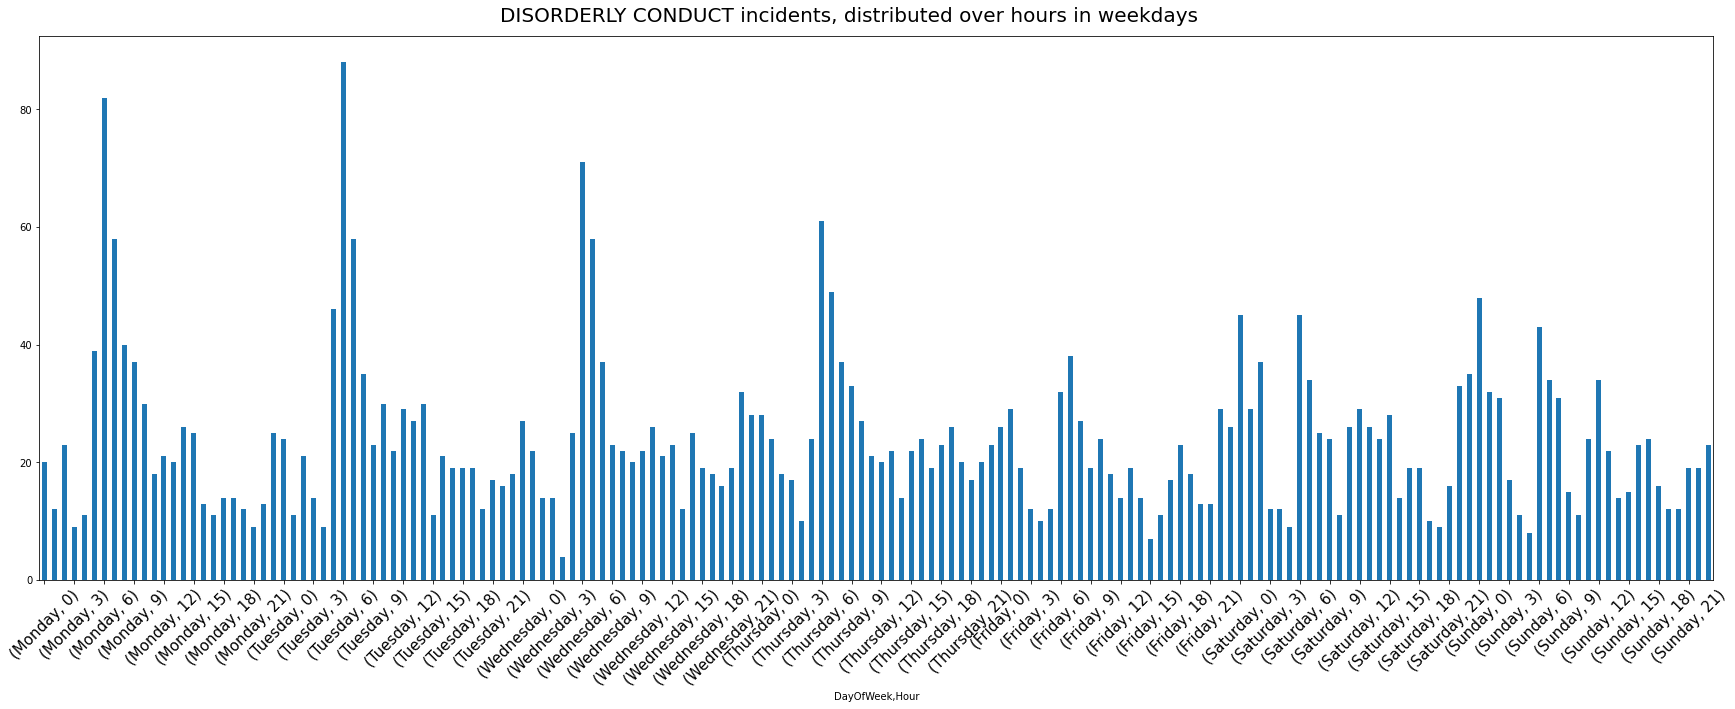

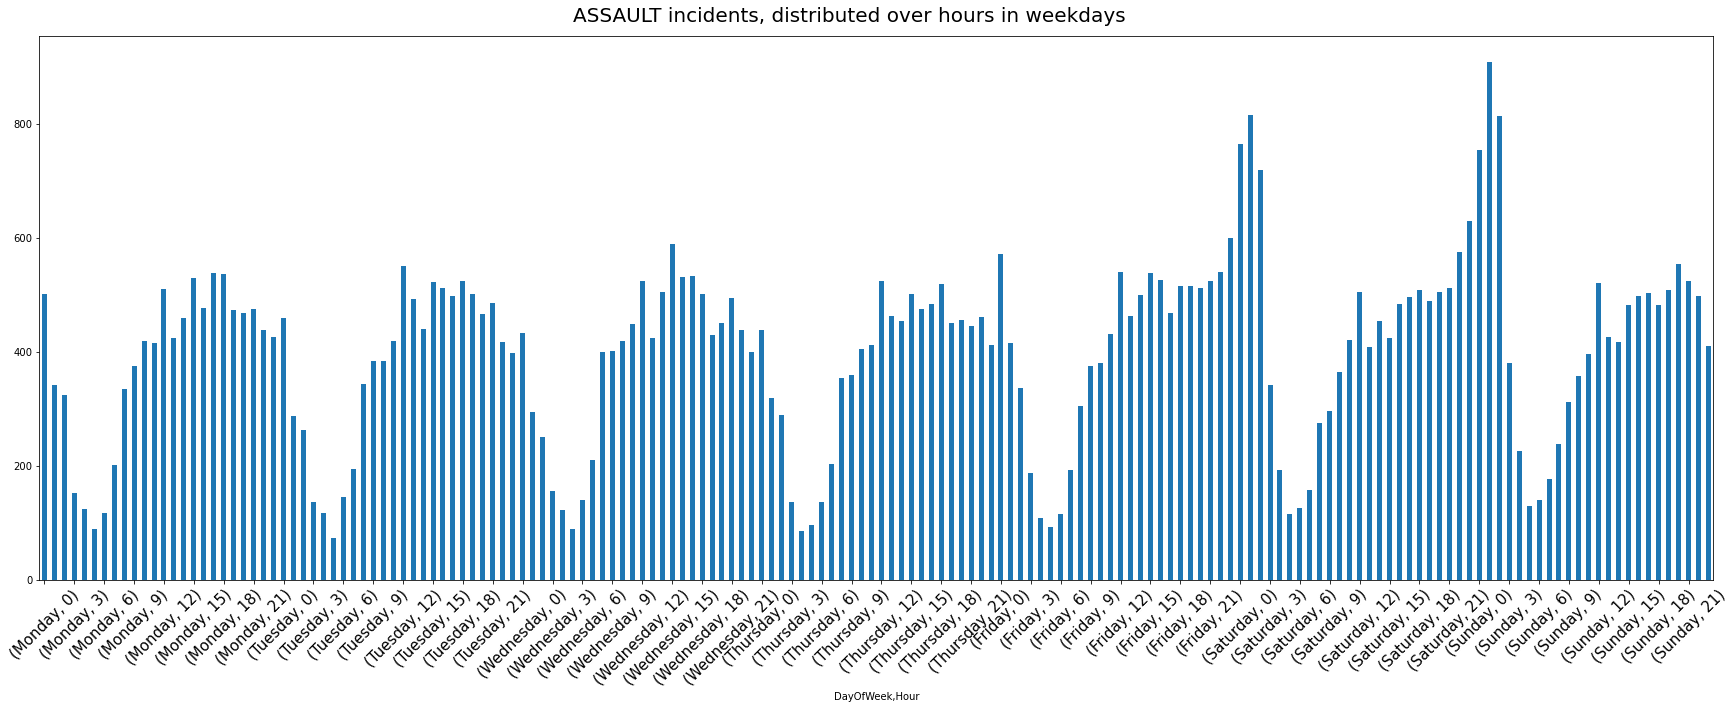

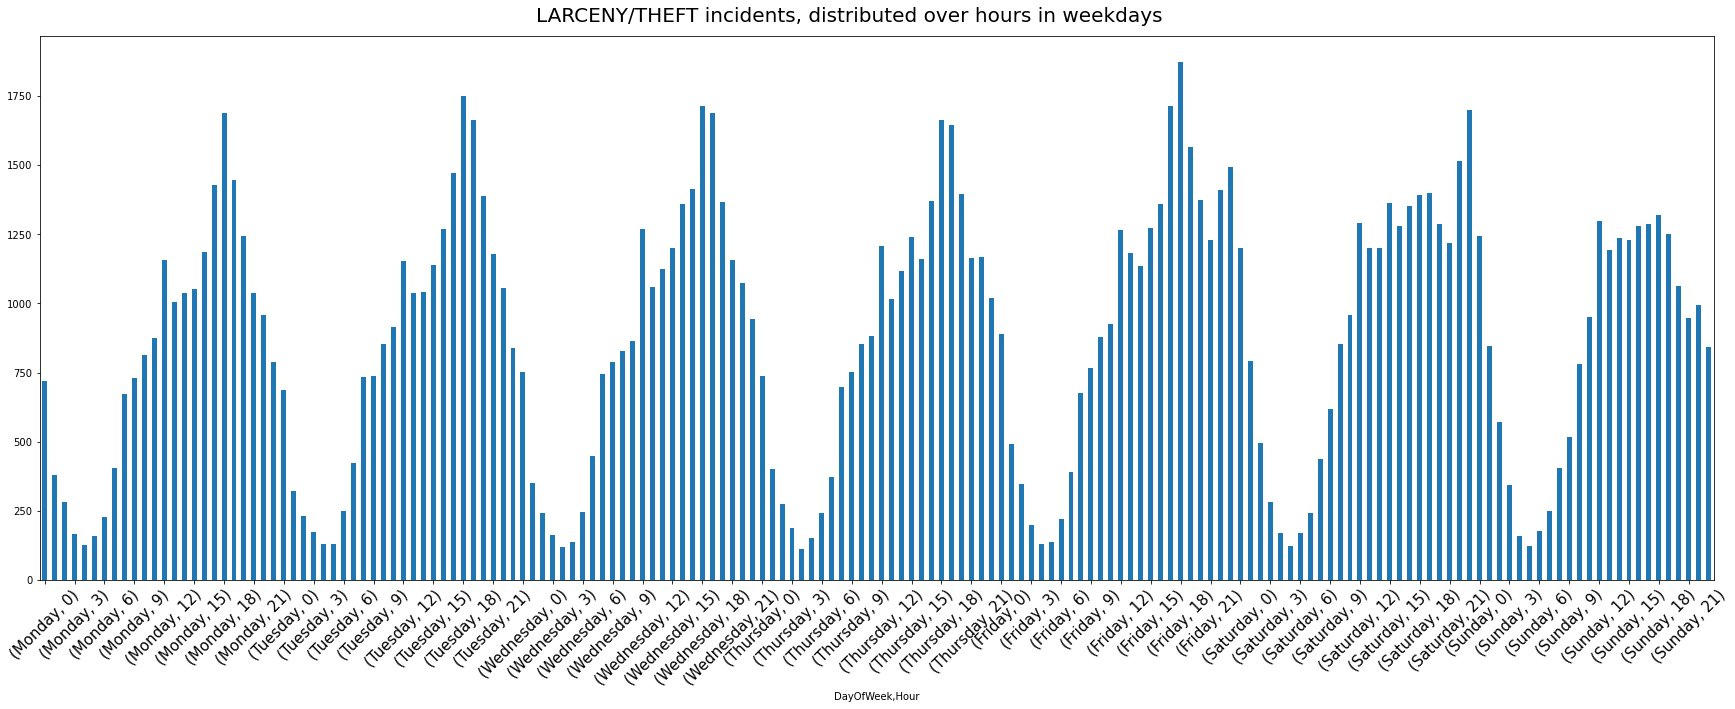

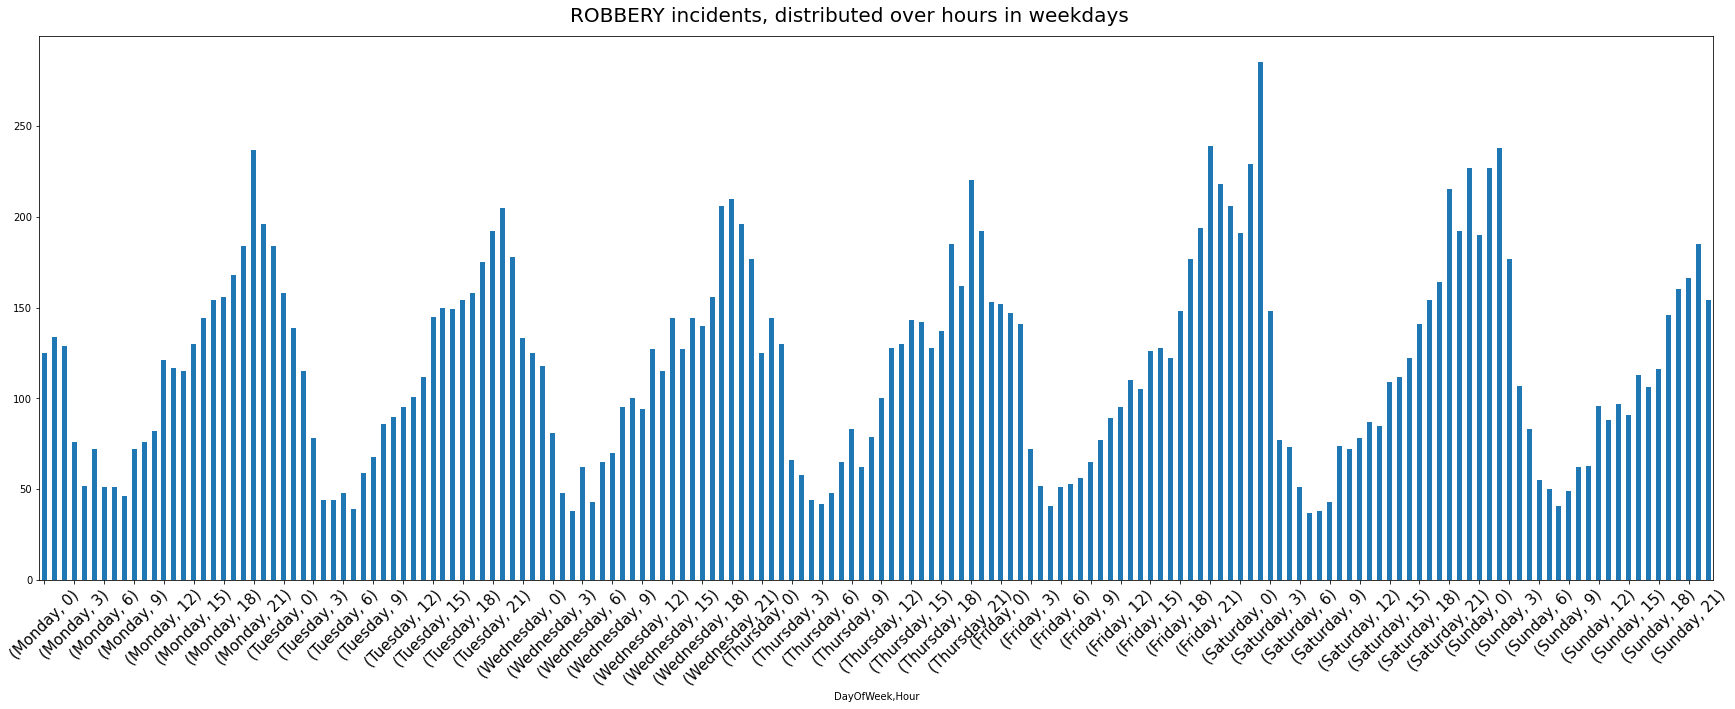

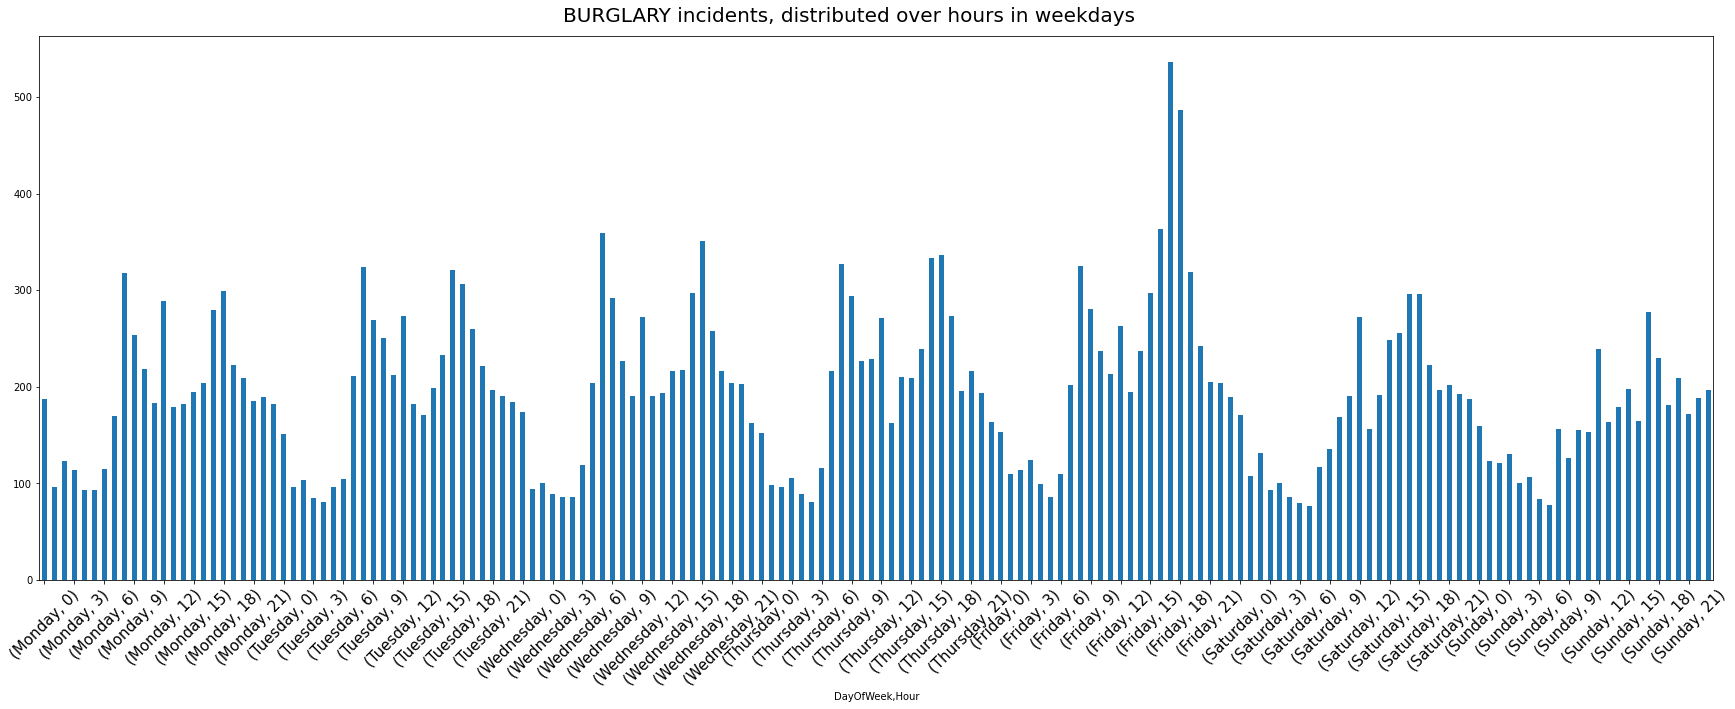

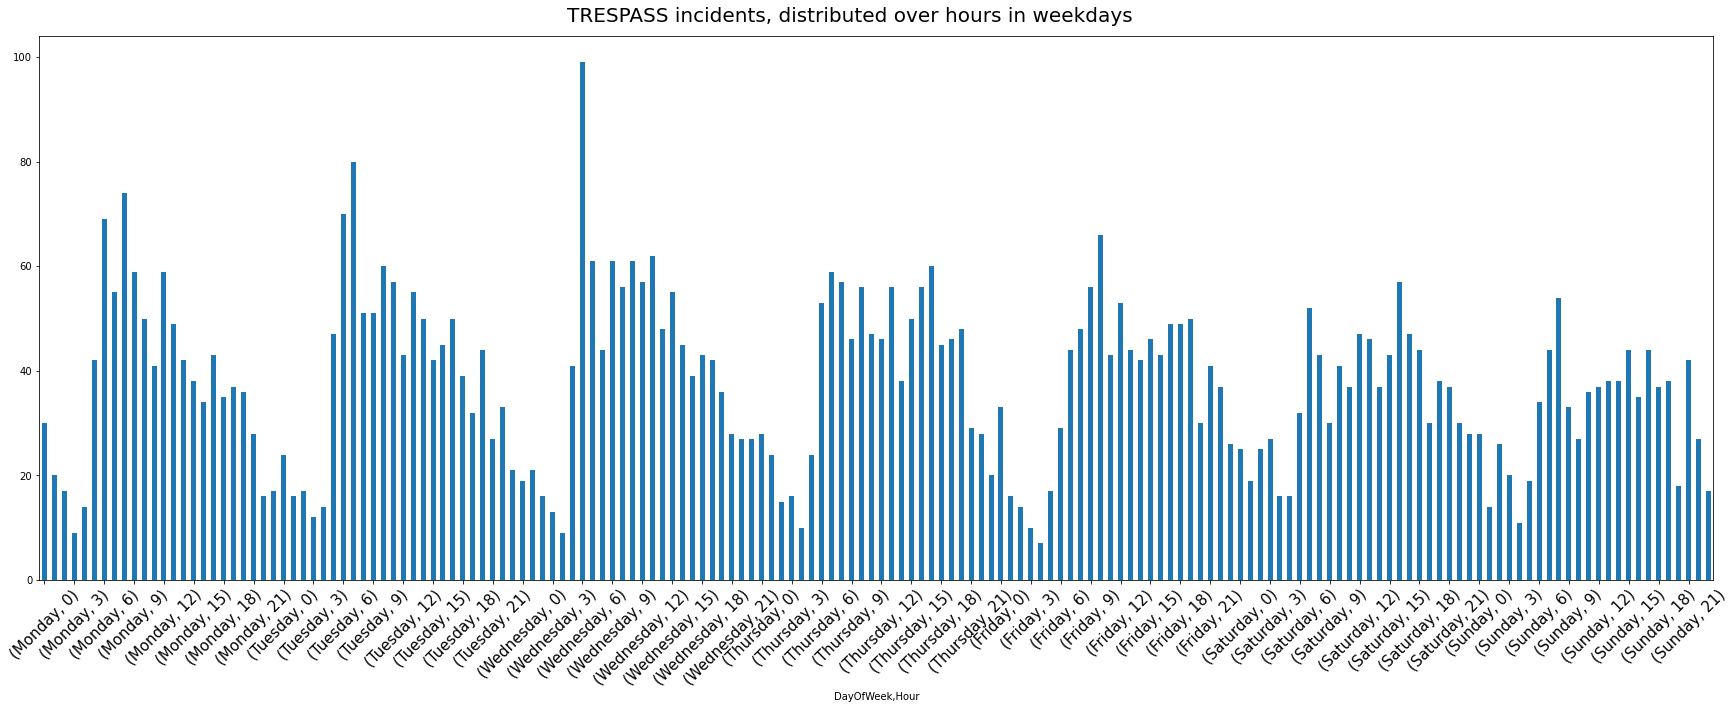

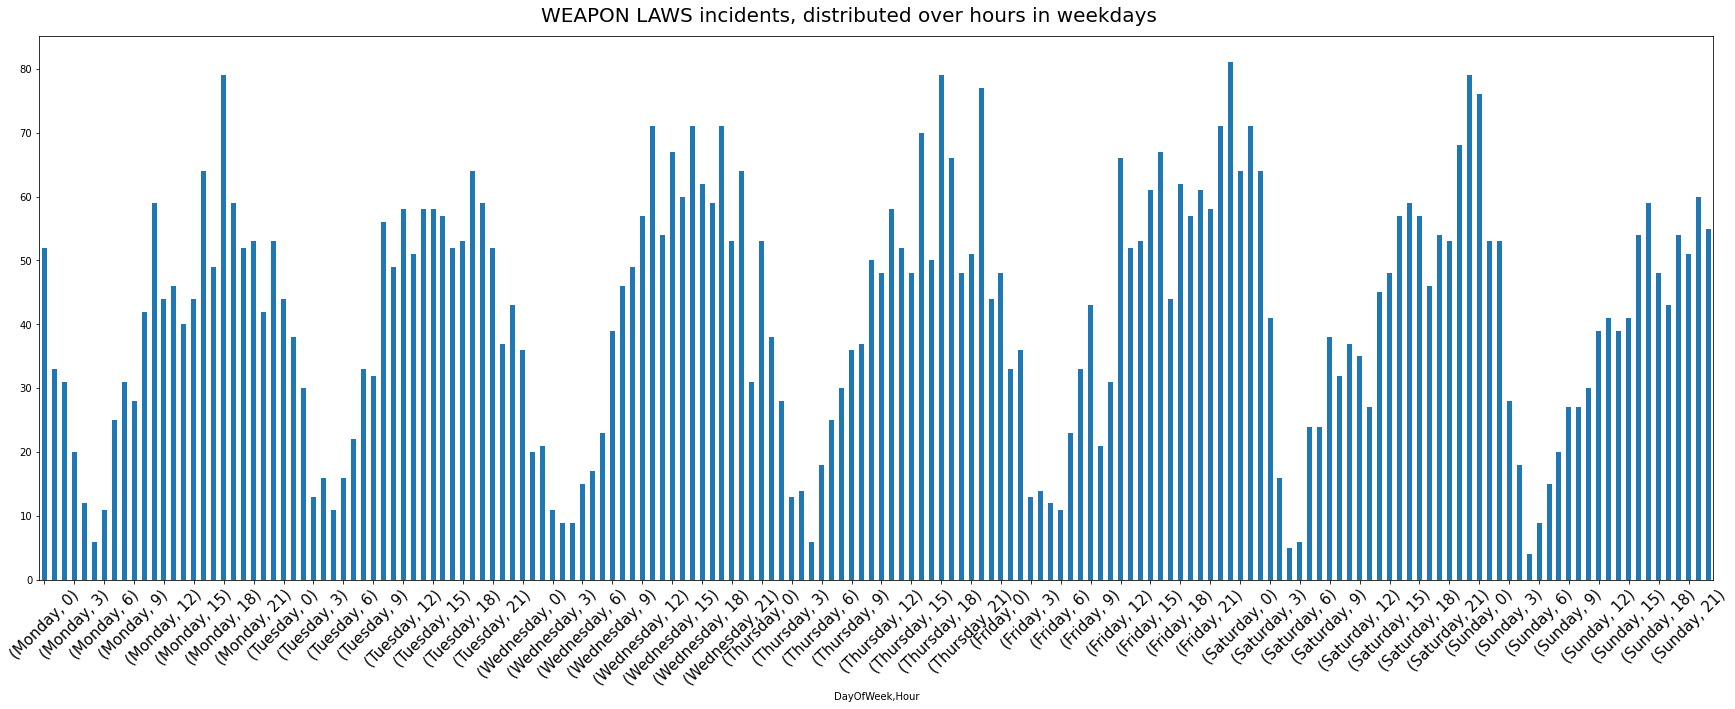

In [10]:
data['DayOfWeek'] = pd.Categorical(data['DayOfWeek'], categories=
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
    ordered=True)

for i in range (len(list(focuscrimes))):
    df=data[data["Category"]==list(focuscrimes)[i]].groupby(["DayOfWeek","Hour"]).count()["IncidntNum"]
    df.plot(x="Hour",y="IncidntNum",kind="bar",figsize=(30,10))
    plt.locator_params(axis='x', nbins=60)
    plt.figtext(.5,.9,str(list(focuscrimes)[i])+" incidents, distributed over hours in weekdays", fontsize=20, ha='center')
    plt.xticks(rotation=45,fontsize=15) 
    plt.show()

# Part 2: Thinking about data and visualization

1) As mentioned earlier, visualization is not the only way to test for correlation. We can (for example) calculate the Pearson correlation. Explain in your own words how the Pearson correlation works and write down it's mathematical formulation. Can you think of an example where it fails (and visualization works)?

2) What is the difference between a bar-chart and a histogram?

3) I mention in the video that it's important to choose the right bin-size in histograms. But how do you do that? Do a Google search to find a criterion you like and explain it.

1) Pearson correlation give us a value between -1 and 1. This value gaves us an indication of how much two phenomena behave when placed in relation.They have a similar behaviour if their value is close to 1, wich means that if one phenomena increases the other will too with the same magnitude. They have an opposite development if the are close to -1, while they do not have any common behaviour pattern if the value is close to 0. However this may be misleading: correlation doesn't imly causality relations between the two phenomena. 

Moreover, we can see that it may fail and have similar values with very different datasets.
    For example the Anscombe-s quartet. All four sets are identical when examined using simple summary statistics like correlation, but vary considerably when graphed.

$pearsonCorrelation = \frac{{}\sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})}
    {\sqrt{\sum_{i=1}^{n} (x_i - \overline{x})^2(y_i - \overline{y})^2}}$
    
    
2) A Bar chart gives as a bar for each entry of the x-axis . An histogram take the data on the x-axis and define some range of values called "bins" and summarize all the data points between the bin boundaries (or close, if gaussian bins) into only one bar.

3) Choose bin sizes with Sturge’s Rule
Sturge’s rule is another way to choose bin sizes. Although it’s widely used in statistical packages for making histograms, it has been criticized for over-smoothing of histograms (Hyndman, 1995). Therefore it should probably be considered a “Rule of Thumb” rather than an absolute formula with the perfect solution.

The formula is:
$ K = 1 + 3.322 logN$

where:
K = number of class intervals (bins).
N = number of observations in the set.
log = logarithm of the number.

Example

For 55 observations in the set, the number of class intervals is:

$K = 1 + 3.322 log(55) = 6.781 ≅ 7$

I like it beacuse it is not a simple find max and min and divide as I like but it's also not overcomplicated as meny other methods are.

# Part 3: Generating important plot types

**First, let's make a jitter-plot** (that is, code up something like Figure 2-1 from DAOST from scratch), but based on SF Police data. My hunch from inspecting the file is that the police-folks might be a little bit lazy in noting down the exact time down to the second. **So choose a crime-type and a suitable time interval** (somewhere between a month and 6 months depending on the crime-type) **and create a jitter plot of the arrest times during a single hour** (like 13-14, for example). So let time run on the $x$-axis and create vertical jitter.

In [11]:
crime="ASSAULT"

selData=data[data["Category"]==crime]

selData["Date"]=pd.to_datetime(selData["Date"], format='%m/%d/%Y')
#print(selData["Date"])

selData=selData[ (selData["Date"]<"2004-02-01") & (selData["Date"]>="2004-01-01") ]#seleziono 1 mesi di tempo

selData["Time"]=pd.to_datetime(selData["Time"], format='%H:%M')

selData=selData[ (selData["Time"].dt.hour<19) & (selData["Time"].dt.hour>=18) ]#seleziono 1 mesi di tempo

#print(selData)

<ipython-input-11-99ea3c4918ea>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selData["Date"]=pd.to_datetime(selData["Date"], format='%m/%d/%Y')


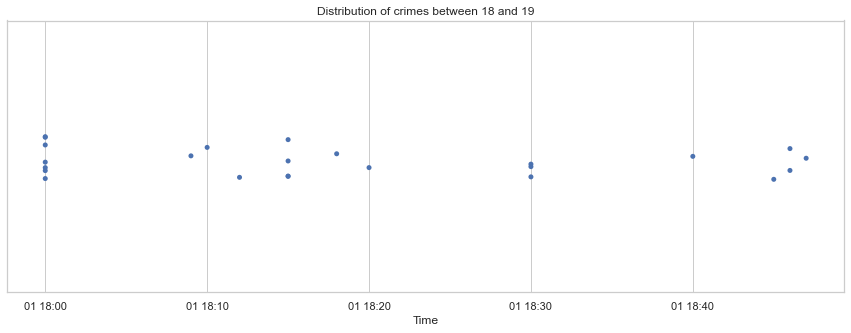

In [12]:
sns.set_theme(style="whitegrid")
fig, jitter = plt.subplots(figsize=(15,5))
jitterPlt = sns.stripplot(x=selData["Time"]).set_title("Distribution of crimes between 18 and 19")

**Now for some histograms** (please create a crime-data based versions of the plot-type shown in DAOST Figure 2-2). (I think the GPS data could be fun to understand from this perspective.)
1) Pick two crime-types with different geographical patterns and a suitable time-interval for each (you want between 1000 and 10000 points in your histogram)
2) Then take the latitude part of the GPS coordinates for each crime and bin the latitudes so that you have around 50 bins across the city of SF. You can use your favorite method for binning. I like numpy.histogram. This function gives you the counts and then you do your own plotting.

In [13]:
crimes=["LARCENY/THEFT","DRUG/NARCOTIC"]

selData1=data[data["Category"]==crimes[0]]
selData1=selData1[ (selData1["Date"]<"2004-04-01") & (selData1["Date"]>="2004-01-01") ]#2 months period
print(selData1.shape)#ho 3035 dats punti

selData2=data[data["Category"]==crimes[1]]
selData2=selData2[ (selData2["Date"]<"2004-04-01") & (selData2["Date"]>="2004-01-01") ]#2 months period
print(selData2.shape)#ho 1396 data points

selData1=selData1[selData1["Y"]<90]#I have 1 outlier maybe an error of a police officer 
selData2=selData2[selData2["Y"]<90]#I have 1 outlier maybe an error of a police officer

(3035, 36)
(1396, 36)


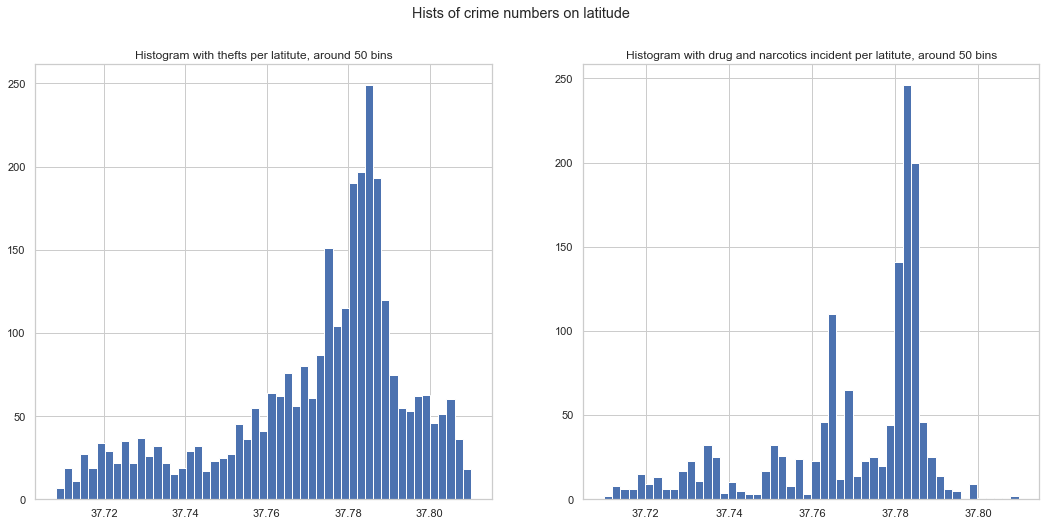

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(18,8))
fig.suptitle('Hists of crime numbers on latitude')
ax1.hist(selData1["Y"], bins=np.arange(selData1["Y"].min(),selData1["Y"].max(),0.002))  # arguments are passed to np.histogram
ax1.set_title("Histogram with thefts per latitute, around 50 bins")

ax2.hist(selData2["Y"], bins=np.arange(selData2["Y"].min(),selData2["Y"].max(),0.002))  # arguments are passed to np.histogram
ax2.set_title("Histogram with drug and narcotics incident per latitute, around 50 bins")

plt.show()

## Part 4: A bit of geo-data
Now we look at studying geospatial data by plotting raw data points as well as heatmaps on top of actual maps.
1) First start by plotting a map of San Francisco with a nice tight zoom. Simply use the command folium.Map([lat, lon], zoom_start=13), where you'll have to look up San Francisco's longitude and latitude.

2) Next, use the the coordinates for SF City Hall 37.77919, -122.41914 to indicate its location on the map with a nice, pop-up enabled maker. 

In [15]:
mappaSF=folium.Map([37.7749, -122.4194], zoom_start=13)
folium.Marker([37.77919, -122.41914],poupup='City Hall',icon=folium.Icon(color="green",icon="tower") ).add_to(mappaSF)
#icon="" types here: https://getbootstrap.com/docs/3.3/components/ solo aprte finale serve
mappaSF

Now, let's plot some more data (no need for popups this time). **Select a couple of months of data for 'DRUG/NARCOTIC' and draw a little dot for each arrest for those two months.** You could, for example, choose June-July 2016, but you can choose anything you like - the main concern is to not have too many points as this uses a lot of memory and makes Folium behave non-optimally. We can call this a kind of visualization a point scatter plot.

In [16]:
crime='DRUG/NARCOTIC'
selData=data[data["Category"]==crime]
selData=selData[ (selData["Date"]<"2006-07-01") & (selData["Date"]>="2006-06-01") ].reset_index("PdId")#seleziono 1 mese di tempo(june-July)


In [17]:
mappaSF=folium.Map([37.7749, -122.4194], zoom_start=13)
for i in range(selData.shape[0]):
    folium.Marker([selData.iloc[i]["Y"],selData.iloc[i]["X"]],poupup='Drug/narcotic crime signal',icon=folium.Icon(color="red",icon="warning-sign") ).add_to(mappaSF)


mappaSF

## Part 5: Errors in the data. The importance of looking at raw (or close to raw) data.

We started the course by plotting simple histogram plots that showed a lot of cool patterns. But sometimes the binning can hide imprecision, irregularity, and simple errors in the data that could be misleading. In the work we've done so far, we've already come across at least three examples of this in the SF data.

1) In the hourly activity for PROSTITUTION something surprising is going on on Thursday. Remind yourself here, where I've highlighted the phenomenon I'm talking about.

2) When we investigated the details of how the timestamps are recorded using jitter-plots, we saw that many more crimes were recorded e.g. on the hour, 15 minutes past the hour, and to a lesser in whole increments of 10 minutes. Crimes didn't appear to be recorded as frequently in between those round numbers. Remind yourself here, where I've highlighted the phenomenon I'm talking about.

3) And finally, today we saw that the Hall of Justice seemed to be an unlikely hotspot for sex offences. Remind yourself here.

Exercise: Data errors. The data errors we discovered above become difficult to notice when we aggregate data (and when we calculate mean values, as well as statistics more generally). Thus, when we visualize, errors become difficult to notice when when we bin the data. We explore this process in the exercise below.

The exercise is simply this:

**For each of the three examples above, describe in your own words how the data-errors I call attention to above can bias the binned versions of the data. Also briefly mention how not noticing these errors can result in misconceptions about the underlying patterns of what's going on in San Francisco (and our modeling).**

1) ???

2) As humans we tend to simplify. So if a crime happens at 18.01 why not say that is 18? However this may cause problem to time-related analysis. Let's take for example that we have a cluster of crimes happening at close times . They might sime related like a gang is making crimes togheter. So we could think that at a given time in a given place putting some policemen might reduce that , but in reality it was simply a group o lazy policemen that said it was close to 18 so let's make it at 18.
Moreover, we can think that the policemen did not write down the arrest time and put the data in the database only when they were forced to doing it(like for processes).
So the time they put in is approximative.
This might also give us an idea of why many crimes are registered at the justice court.

3) As mentioned before, the unusual amount of crimes at the Hall of Justice may not be realted to an hidden prostituion activity but simply to the fact that many reportages were uncomplete on the location or were added later.
Maybe the sistem added automatically the location if missing, taking itself as a reference .
This however might give a wrong idea to a non SanFrancisco's data analizer or automatic crime predicitng systems that don't think about these facts.